<a href="https://colab.research.google.com/github/ayrna/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este cuaderno est√° basado en los cuadernos del libro [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff).

> This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.
> **If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**
> This notebook was generated for TensorFlow 2.6.

# Clasificaci√≥n y regresi√≥n con redes neuronales: glosario

Los casos de uso m√°s habituales con redes neuronales son problemas de clasificaci√≥n (binaria o multiclase) o regresi√≥n:
* Clases: conjunto posible de etiquetas del problema.
* Etiqueta: especifica a una muestra/patr√≥n (la imagen #345 est√° etiquetada como "gato")
* Clasificaci√≥n binaria: clasificaci√≥n con dos categor√≠as excluyentes
* Clasificaci√≥n multiclase: tenemos varias categor√≠as excluyentes.
* Clasificaci√≥n multi-etiqueta: a cada muestra se le puede asignar varias etiquetas.
* Regresi√≥n escalar: la variable objetivo es una variable continua escalar.
* Regresi√≥n vectorial/vector: la variable objetivo es un vector de valores continuos, por ejemplo las coordenadas de un rect√°ngulo donde se encuentra un objeto.
* Lote/batch/mini-bach: un conjunto peque√±o de muestras que se procesa simult√°neamente (en entrenamiento o en inferencia) por las limitaciones de memoria. Normalmente se expresa en potencias de 2 entre 8 y 128.

## Ejemplo de clasificaci√≥n binaria: rese√±as de pel√≠culas

### El conjunto de datos IMDB

Conjunto de datos IMDB: un conjunto de 50.000 rese√±as **muy polarizadas** de la Internet Movie Database. Se dividen en 25.000 cr√≠ticas para entrenamiento y 25.000 cr√≠ticas para test, cada conjunto consta de un 50% de cr√≠ticas negativas y un 50% de cr√≠ticas positivas.

Al igual que el conjunto de datos MNIST, el conjunto de datos IMDB est√° disponible en Keras. Ya ha sido preprocesado: las rese√±as (secuencias de palabras) se han convertido en secuencias de n√∫meros enteros, donde cada n√∫mero entero representa una palabra espec√≠fica de un diccionario (reducido). Esto nos permite centrarnos en la construcci√≥n, entrenamiento y la evaluaci√≥n del modelo.

**Cargar el conjunto de datos IMDB**
`num_words=10000` filtra a las palabras m√°s frecuentes en los datos de entrenamiento de las 88.585 disponibles.



In [133]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Las variables `train_data` y `test_data` son una secuencia de √≠ndices de las palabras de cada rese√±a.

Las etiquetas 0 y 1 significan que la rese√±a es *negativa* o *positiva* respectivamente.

In [134]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [135]:
train_labels[0]

np.int64(1)

Como nos limitamos a las 10.000 palabras m√°s frecuentes, ning√∫n √≠ndice de palabras superar√° las 10.000:

In [136]:
max([max(sequence) for sequence in train_data])

9999

**Decodificar el texto de una rese√±a**

In [137]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # Los 3 primeros √≠ndices est√°n reservados
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Ejemplo de una rese√±a negativa

In [138]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]])
print(decoded_review)

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[2]])
print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
? this has to be one of the worst films of the 1990s when 

### Preparaci√≥n de los datos

Las redes neuronales necesitan trabajar con datos del mismo tama√±o. Por tanto , no se pueden introducir directamente listas variables de enteros en la red neuronal y tenemos que **convertir las listas en tensores**. Hay dos maneras de hacerlo:

 * Rellenar las listas para que todas tengan la misma longitud como un tensor entero de la forma (muestras, longitud_m√°xima), y utilizar una capa que pueda procesar directamente enteros como la capa tipo [`Embedding`](https://keras.io/api/layers/core_layers/embedding/). Ver [Understanding Embedding Layer in Keras](https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce) para ampliar.

* *Multi-hot encode*: Codificar las listas para convertirlas en vectores de 0s y 1s. Por ejemplo, convertir la secuencia [8, 5] en un vector de 10.000 dimensiones que ser√≠a todo 0s excepto los √≠ndices 8 y 5, que ser√≠an 1s. As√≠ ya se podr√≠a usar una capa `Dense`, capaz de manejar datos vectoriales de punto flotante, como la primera capa del modelo.

**Codificando las secuencias de enteros como *multi-hot encoding***

Vectorizaci√≥n de los datos de entrada:

In [139]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [140]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorizaci√≥n de las etiquetas y transformaci√≥n a `float32`:

In [141]:
print(type(train_labels))
print(type(train_labels[0]))


<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [142]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Construcci√≥n del modelo

Despues del preprocesamiento, los datos de entrada son vectores, y las etiquetas son escalares (1s y 0s). Esta es una de las configuraciones de problemas m√°s simples que se pueden encontrar. Un tipo de modelo que funciona bien en este tipo de problemas es una pila simple de capas totalmente conectadas (`Dense`) con activaciones `relu`.

Hay **dos decisiones clave** de arquitectura que se deben tomar sobre tal pila de capas densas:

* Cu√°ntas capas utilizar
* Cu√°ntas unidades elegir para cada capa

En el cap√≠tulo 5 del libro ([Fundamentals of Machine Learning](https://livebook.manning.com/book/deep-learning-with-python-second-edition/chapter-5)) se indican m√°s principios y heur√≠sticas para orientar la definici√≥n de la arquitectura.

Por el momento utilizaremos la siguiente arquitectura:
* 1 o 2 capas intermedias con varias unidades cada una
* Una tercera capa que emitir√° la predicci√≥n escalar sobre la opini√≥n de la rese√±a actual

Nota de traducci√≥n: **sentiment != sentimiento**



**Definici√≥n del modelo**

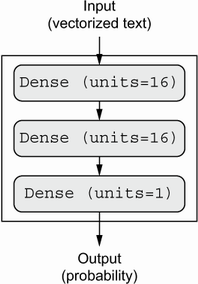



In [143]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

El primer argumento que se pasa a cada capa Dense es el n√∫mero de unidades de la capa: la dimensionalidad del espacio de representaci√≥n de la capa.

Recordemos la implementaci√≥n de cada capa:

```
output = relu(dot(input, W) + b)
```
Tener 16 unidades significa que la matriz de pesos `W` tendr√° forma `(input_dimension, 16)`: el producto escalar con `W` proyectar√° los datos de entrada en un espacio de representaci√≥n de 16 dimensiones (y luego a√±adir√° el vector de sesgo `b` y aplicar√° la operaci√≥n `relu`).

‚ùì‚ùì‚ùì

¬øQu√© implicaciones tiene el aumento o reducci√≥n de la dimensionalidad de la capa

‚ùì‚ùì‚ùì

El aumento de la dimensionalidad de una capa de una red neuronal permite aumentar la capacidad de representaci√≥n del modelo, es decir, permite modelar funciones m√°s completajas y aprender patrones m√°s complejos. Sin embargo, al contener m√°s par√°metros, tambi√©n necesitan mayor tiempo de entrenamiento y, consecuentemente, m√°s energ√≠a. Otra desventaja de aumentar la dimensionalidad de las capas es que la red puede sufrir de overfitting o del desvanecimiento del gradiente al memorizar los datos de entrenamiento en lugar de generalizar.

Por otro lado, si disminuimos la dimensionalidad de la capa existe un menor riesgo de overfitting y se reduce el coste de computaci√≥n, pero puede que la red no tenga la capacidad suficiente apra aprender patrones complejos en los datos y puede ser que el modelo sufra de underfitting, es decir, que el modelo sea demasiado simple para poder aprender las relaciones importantes de los datos.



Funci√≥n relu:

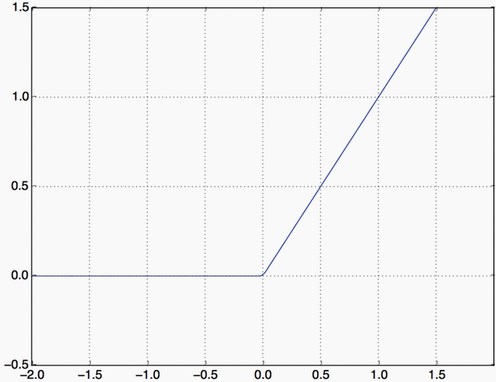

Funci√≥n sigmoide:

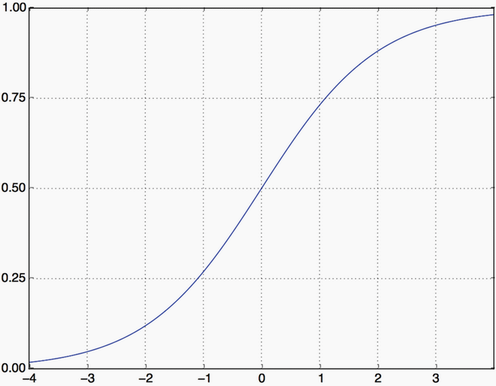

‚ùì‚ùì‚ùì

¬øPor qu√© son necesarias las funciones de activaci√≥n?

‚ùì‚ùì‚ùì


Si no hubiera funciones de activaci√≥n la salida del modelo ser√≠a lineal. Es decir, las operaciones de la red ser√≠an combinaciones lineales de los datos de entrada. Los problemas del mundo real son problemas no lineales.

Las funciones de activaci√≥n permiten aprender jerarqu√≠as de caracter√≠sticas, distinguir entre diferentes clases de datos y logran que los gradientes fluyan adecuadamente durante el entrenamiento.

**Compilaci√≥n del modelo**

Como funci√≥n de p√©rdida alternativamente podr√≠amos usar `mean_squared_error` aunque en principio la entrop√≠a cruzada es m√°s adecuada para trabajar con datos probabil√≠sticos ya que mide la distancia entre distribuciones de probabilidad (*Crossentropy*).

Resumen de la entrop√≠a cruzada:

* El error cuadr√°tico medio ($MSE$) no es la funci√≥n natural de error cuando tenemos salidas probabil√≠sticas, ya que trata por igual cualquier diferencia de error.
* Para problemas de clasificaci√≥n, deber√≠amos penalizar m√°s los errores cometidos para la clase correcta ($d_j=1$) que para la incorrecta ($d_j=0$).
* La entrop√≠a cruzada ($-\ln $ verosimilitud) es m√°s adecuada para problemas de clasificaci√≥n ya que compara las dos distribuciones de probabilidad:
\begin{equation}
L = - \frac{1}{N\cdot J} \sum_{p=1}^N\left(\sum_{o=1}^J d_{po} \ln(o_{po}) \right)
\end{equation}


‚ùì‚ùì‚ùì

**EJERCICIO:** ¬øCu√°les ser√≠an las dos distribuciones de probabilidad?

‚ùì‚ùì‚ùì

La entrop√≠a cruzada mide la distancia entre:

**La distribuci√≥n real** ‚Üí ùëë, las clases verdaderas (one-hot).

**La distribuci√≥n predicha** ‚Üí ùëú, las probabilidades predichas por el modelo.

Cuanto m√°s cerca est√° la distribuci√≥n predicha de la real, m√°s baja es la entrop√≠a cruzada.
Cuando la predicci√≥n es perfecta (la probabilidad predicha es 1 para la clase correcta), la entrop√≠a cruzada es 0.

In [144]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validaci√≥n del modelo

**Reservar un conjunto de validaci√≥n**

Nota: en este conjunto de datos se puede hacer porque los suponemos aleatorizados. **Recuerda conceptos como estratificaci√≥n al dividir el conjunto de datos en entrenamiento, validaci√≥n y test**‚ùó‚ùó‚ùó.

In [145]:
print(x_train.shape)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

(25000, 10000)


**Entrenar/ajustar el modelo**

Par√°metros:
* Datos de entrenamiento y, opcionalmente, de validaci√≥n
* √âpocas
* Tama√±o lotes

El siguiente c√≥digo deber√≠a tardar unos 2 segundos por √©poca:

In [146]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 117ms/step - accuracy: 0.7065 - loss: 0.5984 - val_accuracy: 0.8571 - val_loss: 0.4167
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 51ms/step - accuracy: 0.8946 - loss: 0.3534 - val_accuracy: 0.8830 - val_loss: 0.3197
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 52ms/step - accuracy: 0.9188 - loss: 0.2536 - val_accuracy: 0.8852 - val_loss: 0.2943
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 57ms/step - accuracy: 0.9352 - loss: 0.2038 - val_accuracy: 0.8677 - val_loss: 0.3243
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 58ms/step - accuracy: 0.9436 - loss: 0.1754 - val_accuracy: 0.8742 - val_loss: 0.3188
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 57ms/step - accuracy: 0.9510 - loss: 0.1493 - val_accuracy: 0.8856 - val_loss: 0.28

Visualizaci√≥n del modelo:

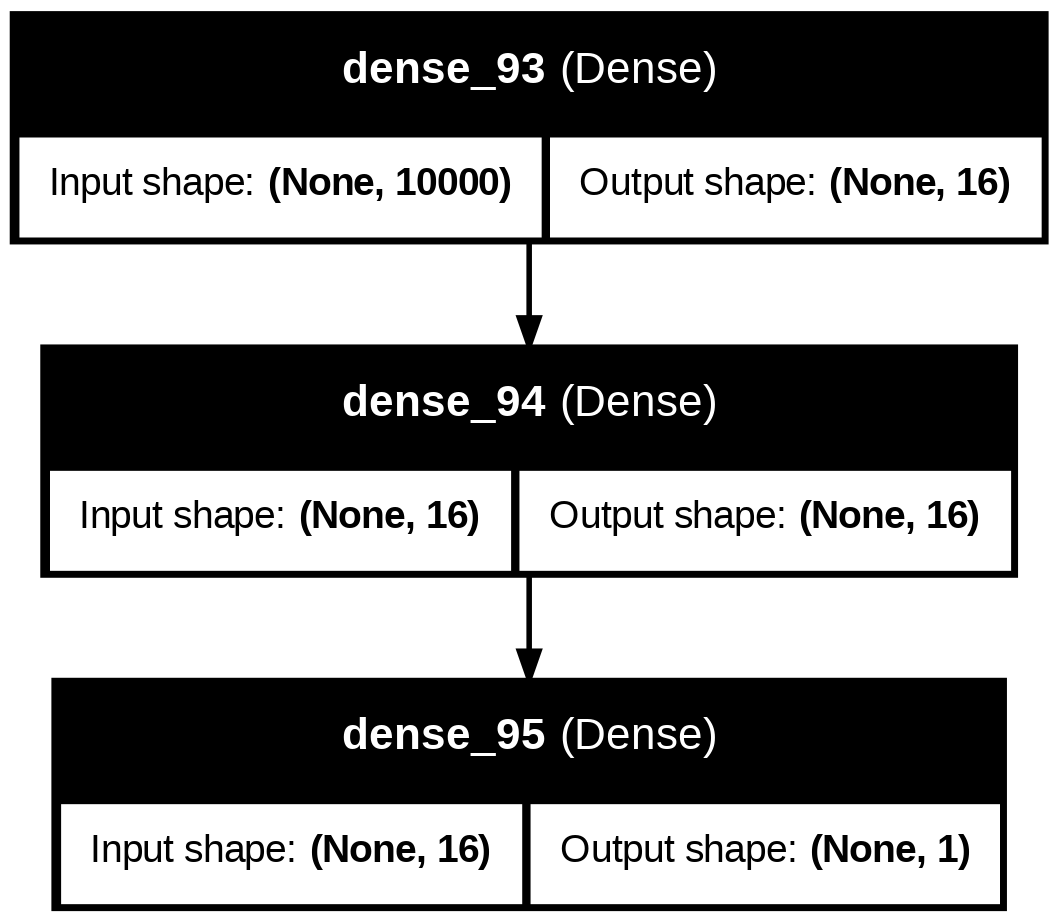

In [147]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)


‚ùì‚ùì‚ùì

**EJERCICIO:** ¬øPor qu√© no hemos podido visualizar el modelo hasta ahora?

‚ùì‚ùì‚ùì

Porque antes del entrenamiento no tenemos la informaci√≥n sobre la estructura del modelo al no estar definido completamente. Los pesos y las conexiones entre las capas se actualizan en funci√≥n de los datos de entrenamiento, por lo que es despu√©s del entrenamiento cuando se puede visualizar el modelo completo con todas las conexiones y formas de capas.



Diccionario de historial del ajuste. En nuestro caso tiene 4 entradas, una por cada m√©trica que se ha monitorizado durante el entrenamiento y la validaci√≥n.

In [148]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Dibujar la **funci√≥n de p√©rdida** en entrenamiento y validaci√≥n:

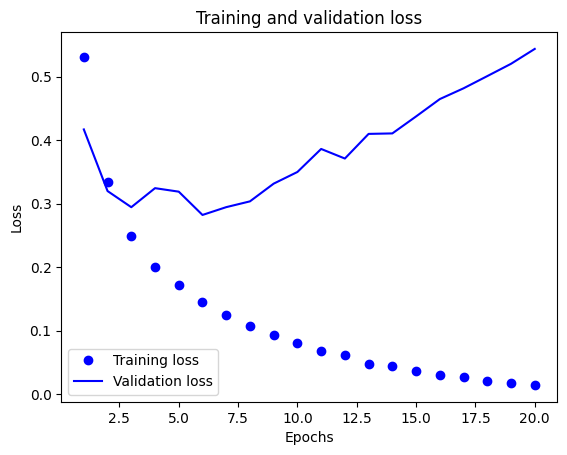

In [149]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Dibujar la precisi√≥n de entenamiento y validaci√≥n:

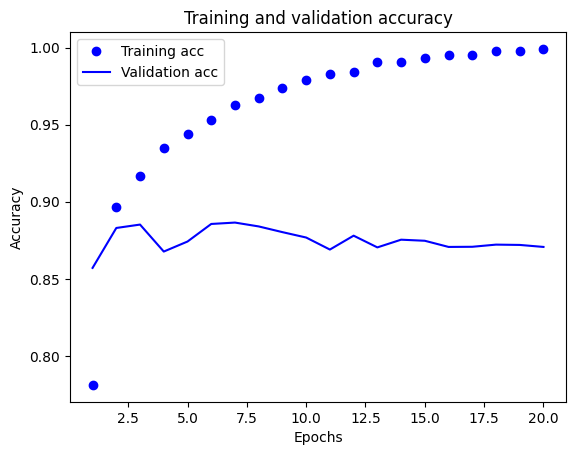

In [150]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

‚ùì‚ùì‚ùì

**EJERCICIO**: ¬øQu√© observas en las gr√°ficas anteriores?
¬øC√≥mo podr√≠amos tratar de arreglar el problema que observas? (incluye c√≥digo y gr√°ficas que lo solucione y visualice)

‚ùì‚ùì‚ùì

Las graficas, en el entrenamiento, comienzan a converger adecuadamente, ya que est√° aprendiendo los datos de entrenamiento durante las √©pocas. Esto provoca que baje la p√©rdida en el entrenamiento y aumente el accuracy en el entrenamiento. Sin embargo, las gr√°ficas en validaci√≥n no se comportan igual. En lugar de disminuir, la p√©rdida en validaci√≥n aumenta. Estas caracter√≠sticas son t√≠picas de un modelo que ha sobreaprendido, es decir, se ha aprendido "de memoria" las caracter√≠sticas de los datos de entrenamiento, pero no es capaz de generalizar las de validaci√≥n y por eso falla en ese conjunto.

Podemos aplicar diferentes soluciones como el aumento de datos, disminuir la dimensionalidad de la red (hacerla m√°s simple), cambiar el n√∫mero de √©pocas o cambiar otros hiperpar√°metros.

**Reentrenar el modelo**

Despu√©s de nuestro an√°lisis, podemos volver a reentrenar el modelo con otros par√°metros. ¬øQu√© cambiar√≠as?



```
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(...)
model.fit(...)
results = model.evaluate(x_test, y_test)
```

Haz tus pruebas aqu√≠:

In [151]:
# Definir modelo
model = keras.Sequential([
    # layers.Dense(1, activation="relu"),
    # layers.Dense(3, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compilar
model.compile(optimizer="Adam", # Optimizador cambiado a Adam
              loss="mse", # Cambio del loss
              metrics=["accuracy"])

# Entrenar
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=64, # Reducir para reducir el consumo de memoria
                    validation_data=(x_val, y_val),
                    shuffle=True)

history_dict = history.history
history_dict.keys()

Epoch 1/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 16ms/step - accuracy: 0.7473 - loss: 0.2025 - val_accuracy: 0.8625 - val_loss: 0.1346
Epoch 2/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.8952 - loss: 0.1157 - val_accuracy: 0.8814 - val_loss: 0.1107
Epoch 3/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.9115 - loss: 0.0923 - val_accuracy: 0.8878 - val_loss: 0.1002
Epoch 4/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.9235 - loss: 0.0807 - val_accuracy: 0.8900 - val_loss: 0.0944
Epoch 5/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.9357 - loss: 0.0705 - val_accuracy: 0.8916 - val_loss: 0.0908
Epoch 6/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 14ms/step - accuracy: 0.9461 - loss: 0.0621 - val_accuracy: 0.8920 - val_los

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

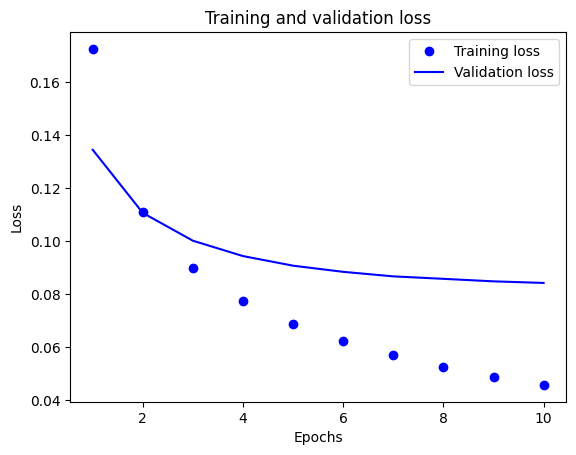

In [152]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

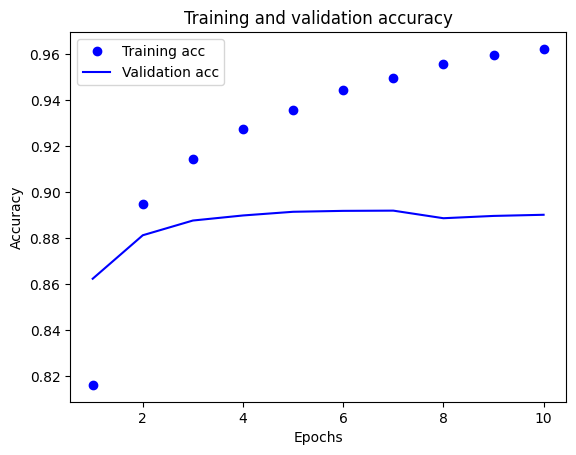

In [153]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Al final el modelo que mejor ha resultado ha sido mantener la √∫ltima capa sigmoide y quitar las capas densas para simplificar el modelo y evitar el sobreaprendizaje.

Sin embargo, el modelo sigue convergiendo en accuracy alrededor de la quinta √©poca.

### Hacer predicciones en datos nuevos

In [154]:
model.predict(x_test)

782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 4ms/step


array([[0.31322128],
       [0.99561495],
       [0.8507011 ],
       ...,
       [0.18557322],
       [0.21322381],
       [0.50855154]], dtype=float32)

‚ùì‚ùì‚ùì

**EJERCICIO**: Calcula la precisi√≥n global y la matriz de confusi√≥n en los datos de test (tienes ejemplos en cuadernos anteriores).

‚ùì‚ùì‚ùì

782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 6ms/step
Global Accuracy: 0.88444


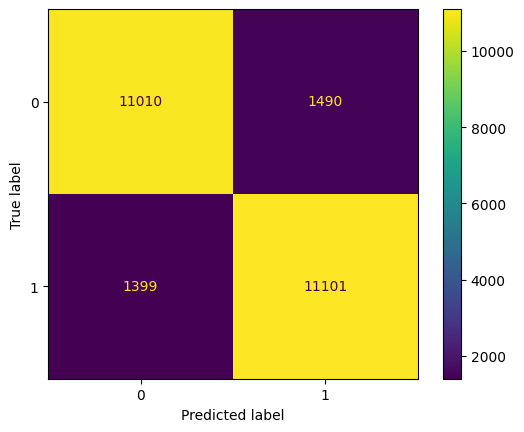

In [155]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predicciones en datos de test
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas predichas
y_pred = np.zeros(predictions.shape)
y_pred[predictions>0.5] = 1

# Calcular la precisi√≥n global
accuracy = accuracy_score(y_test, y_pred)
print("Global Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

### Ampl√≠a experimentos:

Los siguientes experimentos te ayudar√°n a convencerte de que las elecciones de arquitectura que has hecho son bastante razonables, aunque todav√≠a se puede mejorar:

* Hemos utilizado dos capas de representaci√≥n antes de la capa de clasificaci√≥n final. Prueba a utilizar una o tres capas ocultas y observa c√≥mo afecta esto a la validaci√≥n y a la  recisi√≥n de la prueba.
* Prueba a utilizar capas con m√°s o menos unidades: 32 unidades, 64 unidades, etc.
* Prueba a utilizar la funci√≥n de p√©rdida `mse` en lugar de `binary_crossentropy`.
* Prueba a utilizar la funci√≥n de activaci√≥n `tanh` en lugar de `relu`.


‚ùì‚ùì‚ùì

**EJERCICIO**: Como hicimos anterioremente, trata de recoger todo el c√≥digo del notebook en una sola celda que te permita experimental f√°cilmente con diferentes arquitecturas y par√°metros. Puedes asumir que los datos est√°n ya cargados y procesados y centrarte en los experimentos. Necesitar√°s:
1. Definir el modelo
1. Compilar el modelo
1. Ajustar el modelo
1. Dibujar gr√°fica de convergencia
1. Calcular la precisi√≥n en test

‚ùì‚ùì‚ùì


Epoch 1/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 15ms/step - accuracy: 0.7342 - loss: 0.2047 - val_accuracy: 0.8664 - val_loss: 0.1348
Epoch 2/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 8ms/step - accuracy: 0.8957 - loss: 0.1164 - val_accuracy: 0.8808 - val_loss: 0.1113
Epoch 3/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.9143 - loss: 0.0920 - val_accuracy: 0.8902 - val_loss: 0.1001
Epoch 4/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 7ms/step - accuracy: 0.9277 - loss: 0.0783 - val_accuracy: 0.8916 - val_loss: 0.0944
Epoch 5/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - accuracy: 0.9374 - loss: 0.0691 - val_accuracy: 0.8919 - val_loss: 0.0906
Epoch 6/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.9433 - loss: 0.0625 - val_accuracy: 0.8929 - val_los

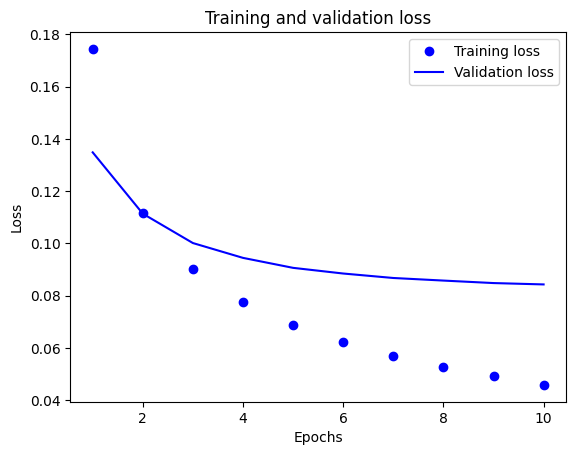

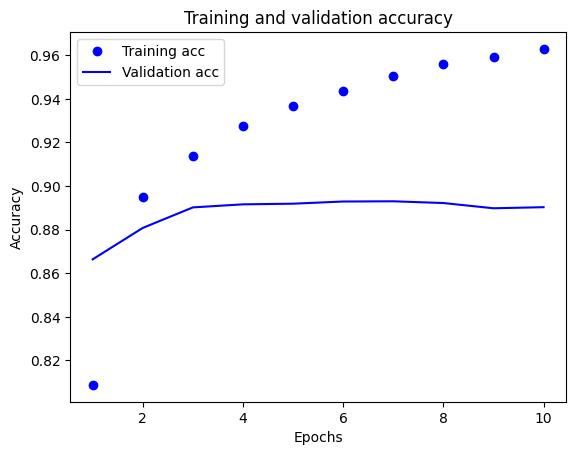

782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 4ms/step
Global Accuracy: 0.88324


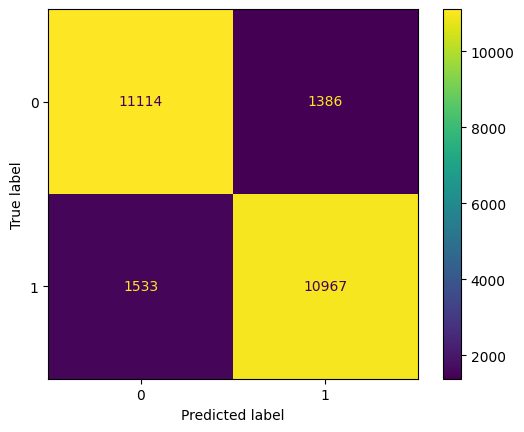

In [156]:
# Definir modelo
model = keras.Sequential([
    # layers.Dense(1, activation="relu"),
    # layers.Dense(3, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compilar
model.compile(optimizer="Adam", # Optimizador cambiado a Adam
              loss="mse", # Cambio del loss
              metrics=["accuracy"])

# Entrenar (Ajuste)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=64, # Reducir para reducir el consumo de memoria
                    validation_data=(x_val, y_val),
                    shuffle=True)

history_dict = history.history
history_dict.keys()

# Graficas de convergencia
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Matriz de confusion
# predicciones en datos de test
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas predichas
y_pred = np.zeros(predictions.shape)
y_pred[predictions>0.5] = 1

# Calcular la precisi√≥n global
accuracy = accuracy_score(y_test, y_pred)
print("Global Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

### Resumen
* Preprocesamiento
* Las pilas de capas `Dense` con `relu` pueden resolver muchos problemas
* En clasificaci√≥n binaria siempre terminamos el modelo con una capa `Dense` y activaci√≥n `sigmoid`.
* Por tanto usamos `binary_crossentropy`.
* Importancia de monitorizar el rendimiento.

## Clasificaci√≥n multiclase: clasificaci√≥n de noticias

* Clasificaci√≥n binaria: categor√≠as m√∫tuamente exclusivas
* Clasificaci√≥n multiclase
 * Clasificaci√≥n multiclase de etiqueta √∫nica
 * Clasificaci√≥n multiclase multi-etiqueta

### Conjunto de datos Reuters

Es un conjunto de datos multi-etiqueta donde cada etiqueta representa un *tema* asociado a una noticia. Hay 46 temas diferentes con distinto nivel de representaci√≥n.

Se puede trabajar como etiqueta simple considerando un tema √∫nico principal.

**Cargar el conjunto de datos Reuters**

In [157]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [158]:
print(len(train_data))
print(len(test_data))
print(train_data[10])
print(train_labels[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
3


**Descodificar las noticias a texto**

In [159]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [160]:
print(decoded_newswire)
print(train_labels[0])
print(train_labels[3])


? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3
4


### Preparaci√≥n de los datos

**Codificaci√≥n de los datos**

In [161]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [162]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(8982, 10000)


**Codificaci√≥n de las etiquetas**

Utilizaremos *one-hot encoding* tambi√©n conocido como *codificaci√≥n categ√≥rica*. Podemos usar la funci√≥n anterior aunque en realidad Keras, scikit-learn y otros suelen tener funciones para esto:


In [163]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Veamos el resultado:

In [164]:
print(train_labels.shape)
print(test_labels.shape)
print(y_train.shape)
print(y_test.shape)

(8982,)
(2246,)
(8982, 46)
(2246, 46)


### Construcci√≥n del modelo

**Definici√≥n del modelo**

‚ùì‚ùì‚ùì **EJERCICIO:** ¬øQu√© valor pondr√≠as en HHH y en XXX?‚ùì‚ùì‚ùì

```
model = keras.Sequential([
    layers.Dense(HHH, activation="relu"),
    layers.Dense(HHH, activation="relu"),
    layers.Dense(XXX, activation="softmax")
])
```

In [165]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(46, activation="softmax") # Numero de clases = 46
])

**Compilaci√≥n del modelo**

‚ùì‚ùì‚ùì **EJERCICIO:** ¬øQu√© funci√≥n de p√©rdida pondr√≠as (ver <https://keras.io/api/losses/>)?‚ùì‚ùì‚ùì

In [166]:
model.compile(optimizer="rmsprop",
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

### Validaci√≥n del dise√±o

**Conjunto de validaci√≥n**

In [167]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Entrenamiento/ajuste del modelo**

In [168]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 77ms/step - accuracy: 0.3307 - loss: 3.5097 - val_accuracy: 0.4750 - val_loss: 2.8883
Epoch 2/20
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 43ms/step - accuracy: 0.4809 - loss: 2.7099 - val_accuracy: 0.5240 - val_loss: 2.3557
Epoch 3/20
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 45ms/step - accuracy: 0.5575 - loss: 2.1970 - val_accuracy: 0.5870 - val_loss: 1.9902
Epoch 4/20
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 45ms/step - accuracy: 0.6225 - loss: 1.8714 - val_accuracy: 0.6280 - val_loss: 1.7298
Epoch 5/20
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 42ms/step - accuracy: 0.6678 - loss: 1.6175 - val_accuracy: 0.6580 - val_loss: 1.5558
Epoch 6/20
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 41ms/step - accuracy: 0.6876 - loss: 1.4582 - val_accuracy: 0.6720 - val_loss: 1.439

**Dibujar la p√©rdida de entrenamiento y validaci√≥n**

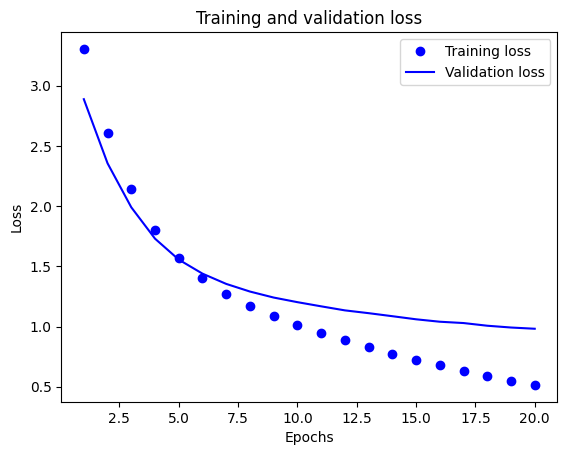

In [169]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Dibujar la precisi√≥n en entrenamiento y validaci√≥n**



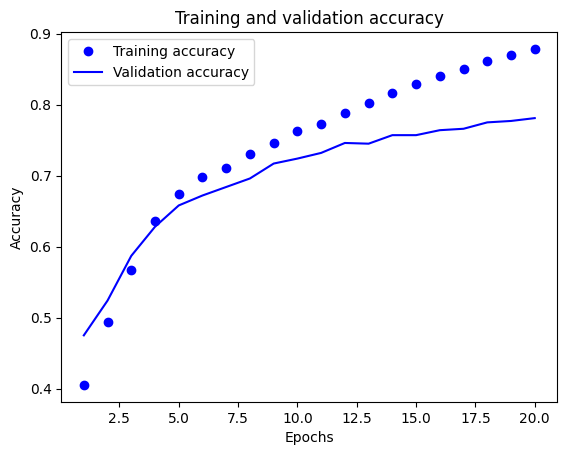

In [170]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

‚ùì‚ùì‚ùì
**EJERCICIO:**
* **¬øDetectas sobreajuste?¬øC√≥mo podemos mitigarlo?**

Al principio parece que se ajusta bastante bien la curva de validaci√≥n, pero conforme van pasando las √©pocas se va separando m√°s de la curva de entrenamiento.
Podemos reajustar el modelo, cambiarle el n√∫mero de neuronas que tienen en cada capa o hacerlo m√°s simple para evitar el sobreajuste.

* ¬øQu√© pasa si usas 1 o 3 capas y con distinto n√∫mero de neuronas (e.j. 8,64,128)?

A√±adir o quitar capas y ajustar el n√∫mero de neuronas afecta la complejidad y capacidad del modelo para capturar patrones en los datos. El n√∫mero de neuronas en cada capa determina la complejidad de la representaci√≥n aprendida, con menos neuronas simplificando el modelo y m√°s neuronas permitiendo una representaci√≥n m√°s detallada pero potencialmente m√°s compleja.

**Reentrenemos desde cero con nuestras conclusiones**
‚ùì‚ùì‚ùì

Epoch 1/10
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 23ms/step - accuracy: 0.3054 - loss: 2.9777 - val_accuracy: 0.6660 - val_loss: 1.4231
Epoch 2/10
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.7158 - loss: 1.2875 - val_accuracy: 0.7370 - val_loss: 1.1660
Epoch 3/10
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.7790 - loss: 0.9692 - val_accuracy: 0.7490 - val_loss: 1.0565
Epoch 4/10
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.8097 - loss: 0.7849 - val_accuracy: 0.7770 - val_loss: 0.9883
Epoch 5/10
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 11ms/step - accuracy: 0.8532 - loss: 0.6279 - val_accuracy: 0.7740 - val_loss: 0.9676
Epoch 6/10
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step - accuracy: 0.8828 - loss: 0.4975 - val_accuracy: 0.7860 - val

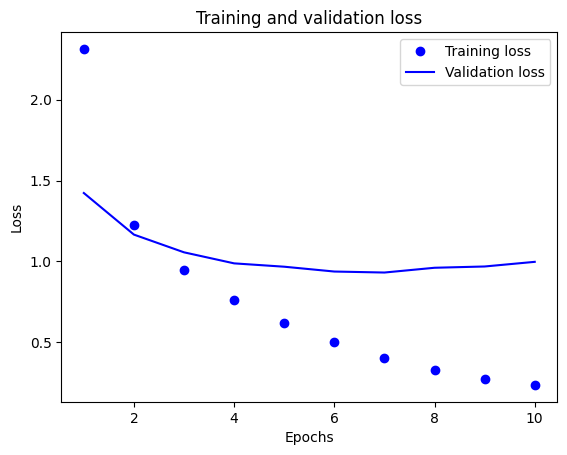

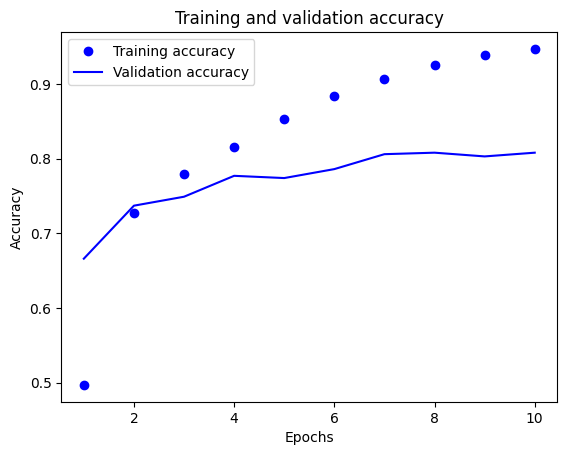

In [171]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Evaluamos en test:

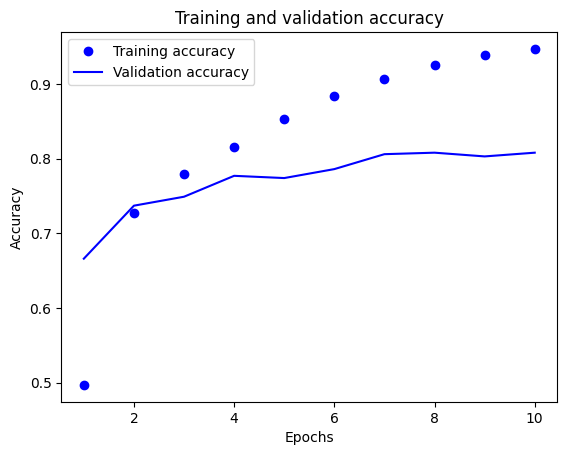

71/71 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.7734 - loss: 1.1403


[1.159839153289795, 0.7680320739746094]

In [172]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
results

¬øC√≥mo interpretamos estos resultados?¬øSon buenos o malos? Para esto tenemos que estimar el rendimiento base. El rendimiento base en un problema binario perfectamente balanceado ser√≠a del 50% (un clasificador aleatorio). ¬øCu√°l es en nuestro caso?

In [173]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.1861086375779163)

### Generar predicciones/salidas sobre datos nuevos

In [174]:
predictions = model.predict(x_test)

71/71 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step


In [175]:
predictions[0].shape

(46,)

In [176]:
np.sum(predictions[0])

np.float32(1.0000001)

In [177]:
np.argmax(predictions[0])

np.int64(4)

### Otra forma de codificar las etiquetas y la p√©rdida

Como tensor de enteros:

In [178]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

Esta variante necesita una funci√≥n de p√©rdida diferente:

In [179]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### La importancia de tener capas intermedias suficientemente grandes

grandes ‚û° anchas

Antes hemos mencionado que, como la capa de salida tiene 46 dimensiones, hay que evitar las capas intermedias con muchas menos de 46 unidades. Veamos qu√© sucede cuando introducimos un ‚Äúcuello de botella‚Äù de informaci√≥n al tener capas intermedias que son significativamente menos de 46 dimensiones: por ejemplo, de 4 dimensiones.

**Ejemplo de modelo con un cuello de botella**

In [180]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 29ms/step - accuracy: 0.1071 - loss: 3.4403 - val_accuracy: 0.5000 - val_loss: 2.5045
Epoch 2/20
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 23ms/step - accuracy: 0.5408 - loss: 2.1486 - val_accuracy: 0.5810 - val_loss: 1.7352
Epoch 3/20
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 25ms/step - accuracy: 0.5858 - loss: 1.5592 - val_accuracy: 0.5850 - val_loss: 1.5688
Epoch 4/20
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 31ms/step - accuracy: 0.6147 - loss: 1.3361 - val_accuracy: 0.6210 - val_loss: 1.4908
Epoch 5/20
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 32ms/step - accuracy: 0.6789 - loss: 1.2326 - val_accuracy: 0.6590 - val_loss: 1.4077
Epoch 6/20
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 23ms/step - accuracy: 0.7282 - loss: 1.1240 - val_accuracy: 0.6810 - val_loss: 1.374

### Experimentos adicionales

‚ùì‚ùì‚ùì
**EJERCICIO:**

Despu√©s de los experimentos: ¬øCu√°les son los par√°metros √≥ptimos de tu modelo?

Los mejores par√°metros que hemos conseguido han sido los del segundo modelo. A√∫n as√≠, podr√≠amos haber seguido probando par√°metros para mejorar los resultados hasta obtener un modelo m√°s eficiente.

‚ùì‚ùì‚ùì

### Resumen

* ¬øCu√°ntas neuronas de salida tienen los modelos anteriores? 46

* ¬øCu√°ndo utilizamos la funci√≥n softmax y cu√°ndo la sigmoide? La funci√≥n softmax se utiliza en la capa de salida de modelos de clasificaci√≥n multiclase, mientras que la funci√≥n sigmoide se utiliza en problemas de clasificaci√≥n binaria o cuando se predice una √∫nica probabilidad.

* ¬øQu√© opciones tenemos para representar las etiquetas en un problema multiclase? Para representar las etiquetas en un problema multiclase, podemos utilizar codificaci√≥n one-hot, que convierte cada etiqueta en un vector binario donde solo una posici√≥n corresponde a la clase y todas las dem√°s son cero.

* ¬øQu√© principios podemos seguir para dise√±ar la arquitectura de la red? Al dise√±ar la arquitectura de la red, podemos seguir principios como la simplicidad, comenzar con una arquitectura b√°sica y aumentar la complejidad seg√∫n sea necesario, utilizar capas y neuronas suficientes para capturar los patrones de los datos. O empezar con complejidad e ir reduciendo evitando el sobreaprendizaje.

## Ejemplo de regresi√≥n: predicci√≥n de precios inmobiliarios

### Base de datos Boston Housing Price


Otro tipo com√∫n de problema de aprendizaje autom√°tico es la **regresi√≥n**, que consiste en predecir un valor continuo en lugar de una etiqueta discreta: por ejemplo, predecir la temperatura ma√±ana, dados los datos meteorol√≥gicos.

En esta secci√≥n, intentaremos predecir el precio medio de las viviendas en un determinado barrio de Boston a mediados de la d√©cada de 1970, a partir de datos sobre el barrio en aquel momento, como el √≠ndice de criminalidad, el tipo del impuesto local sobre bienes inmuebles, etc. En este caso cada una de las caracter√≠sticas tiene una escala diferente lo que nos *obligar√°* a normalizar los datos.

**Carga de Boston housing dataset**

In [181]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [182]:
train_data.shape

(404, 13)

In [183]:
test_data.shape

(102, 13)

In [184]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preprocesado

**Normalizado o estandarizado de datos**

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

> Standardize features by removing the mean and scaling to unit variance.
> The standard score of a sample x is calculated as:
> `z = (x - u) / s`
> where u is the mean of the training samples or zero if with_mean=False, and s > is the standard deviation of the training samples or one if with_std=False.
> Centering and scaling happen independently on each feature by computing the > relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.



In [185]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data) # IMPORTANTE: Los datos de test se escalan con los datos de media y desviaci√≥n de train

### Construcci√≥n del modelo

**Definition**

Al tener pocos patrones vamos a usar un modelo m√°s peque√±o para mitigar el posible sobreentrenamiento.

Esta funci√≥n ser√° √∫til para el dise√±o experimental KFold.

En el caso de regresi√≥n, es habitual no tener una funci√≥n de transferencia en la capa de salida para no restringir los valores de salida.

In [186]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validando el dise√±o con validaci√≥n K-fold

**K-fold validation**

In [187]:
from sklearn.model_selection import KFold

k = 4
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in kf.split(train_data):
  X_train, X_val = train_data[train_index], train_data[val_index]
  y_train, y_val = train_targets[train_index], train_targets[val_index]

  # Build and compile the model
  model = build_model()

  # Train the model
  model.fit(X_train, y_train, epochs=num_epochs, batch_size=16, verbose=0)

  # Evaluate the model
  val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)

  all_scores.append(val_mae)

In [188]:
all_scores

[3.083895444869995, 3.6119725704193115, 3.5386569499969482, 3.087714672088623]

In [189]:
import numpy as np
np.mean(all_scores)

np.float64(3.3305599093437195)

**Guardar los logs de validaci√≥n de cada fold**

In [190]:
from sklearn.model_selection import KFold

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100 # aumentar a 500
all_mae_histories = []

kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in kf.split(train_data):
  X_train, X_val = train_data[train_index], train_data[val_index]
  y_train, y_val = train_targets[train_index], train_targets[val_index]

  # Build and compile the model
  model = build_model()

  # Train the model
  history = model.fit(X_train, y_train, epochs=num_epochs,
                      validation_data=(X_val, y_val),
                      batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)


**Procesamos el historial**

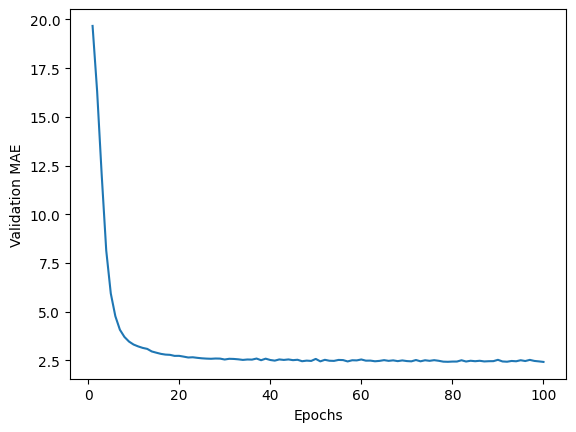

In [191]:
import matplotlib.pyplot as plt
import numpy as np

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Dibujar la puntuaci√≥n de validaci√≥n excluyendo los 10 primeros puntos**

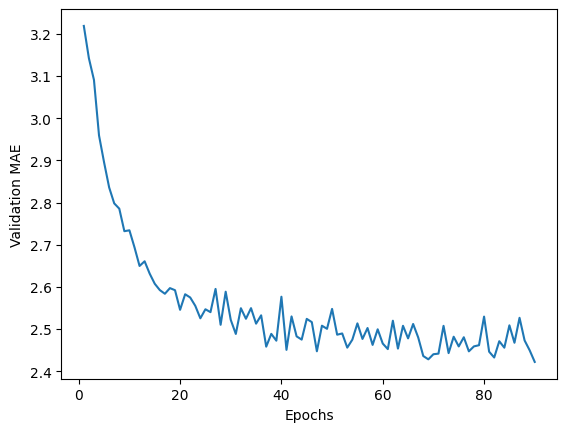

In [192]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Entrenamos el modelo final**

In [193]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 12.6531 - mae: 2.4807


In [194]:
test_mae_score

2.688500165939331

### Predicciones con datos nuevos

In [195]:
predictions = model.predict(test_data)
predictions[0]

4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step


array([8.507615], dtype=float32)

# C√≥digo completo

Epoch 1/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 14ms/step - accuracy: 0.7424 - loss: 0.2028 - val_accuracy: 0.8643 - val_loss: 0.1344
Epoch 2/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.8927 - loss: 0.1176 - val_accuracy: 0.8813 - val_loss: 0.1107
Epoch 3/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.9120 - loss: 0.0925 - val_accuracy: 0.8876 - val_loss: 0.1003
Epoch 4/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 13ms/step - accuracy: 0.9294 - loss: 0.0770 - val_accuracy: 0.8910 - val_loss: 0.0945
Epoch 5/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.9381 - loss: 0.0699 - val_accuracy: 0.8921 - val_loss: 0.0909
Epoch 6/10
235/235 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 15ms/step - accuracy: 0.9455 - loss: 0.0618 - val_accuracy: 0.8917 - val_lo

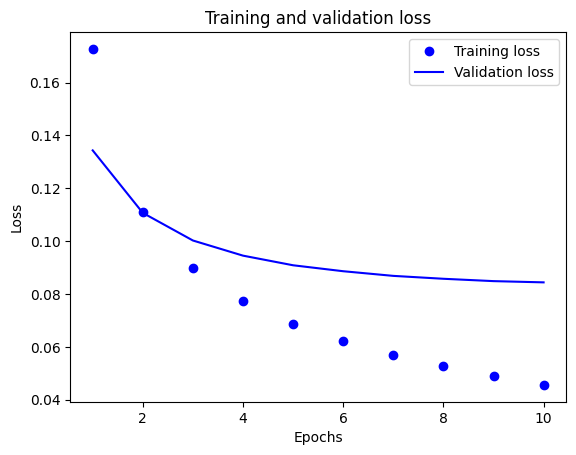

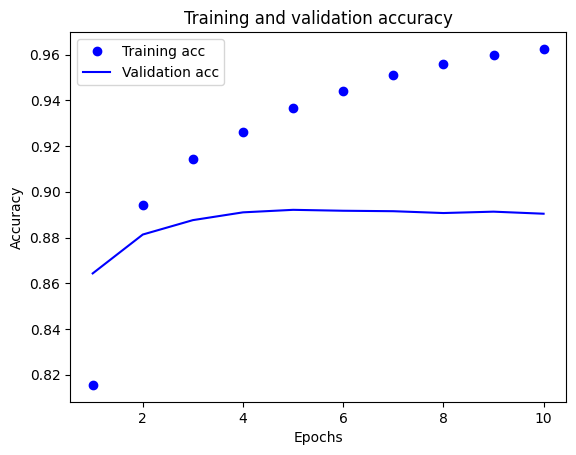

782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step
Global Accuracy: 0.88348


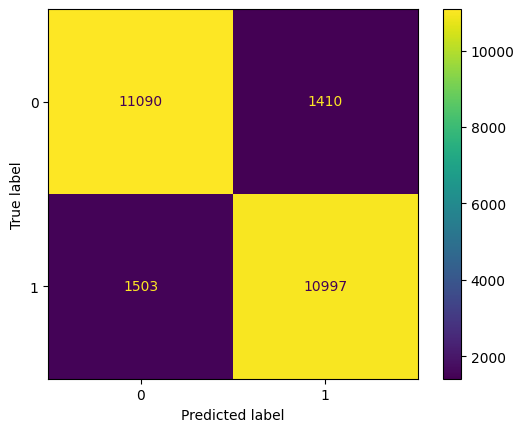

Epoch 1/10
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 15ms/step - accuracy: 0.3968 - loss: 2.6704 - val_accuracy: 0.6710 - val_loss: 1.4024
Epoch 2/10
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 12ms/step - accuracy: 0.7111 - loss: 1.2804 - val_accuracy: 0.7440 - val_loss: 1.1290
Epoch 3/10
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 11ms/step - accuracy: 0.7854 - loss: 0.9365 - val_accuracy: 0.7680 - val_loss: 1.0165
Epoch 4/10
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 16ms/step - accuracy: 0.8403 - loss: 0.6953 - val_accuracy: 0.7940 - val_loss: 0.9407
Epoch 5/10
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 15ms/step - accuracy: 0.8669 - loss: 0.5530 - val_accuracy: 0.8050 - val_loss: 0.9100
Epoch 6/10
125/125 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 12ms/step - accuracy: 0.8935 - loss: 0.4648 - val_accuracy: 0.8130 - val

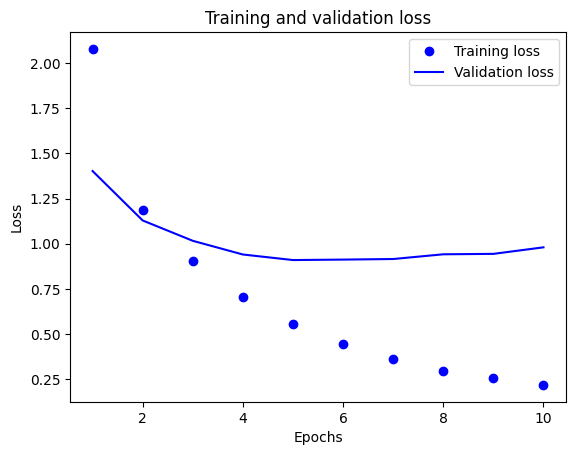

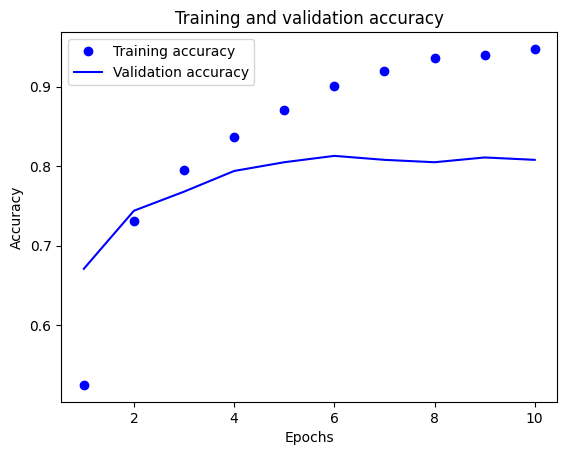

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

## Conjunto de datos de IMBD

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Definir modelo
model = keras.Sequential([
    # layers.Dense(1, activation="relu"),
    # layers.Dense(3, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compilar
model.compile(optimizer="Adam", # Optimizador cambiado a Adam
              loss="mse", # Cambio del loss
              metrics=["accuracy"])

# Entrenar (Ajuste)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=64, # Reducir para reducir el consumo de memoria
                    validation_data=(x_val, y_val),
                    shuffle=True)

history_dict = history.history
history_dict.keys()

# Graficas de convergencia
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Matriz de confusion
# predicciones en datos de test
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas predichas
y_pred = np.zeros(predictions.shape)
y_pred[predictions>0.5] = 1

# Calcular la precisi√≥n global
accuracy = accuracy_score(y_test, y_pred)
print("Global Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


## Conjunto de datos de Reuters
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()